# Creating an Algorithmic Composition

10 minutes (15 max) on philosophy behind algorithmic composition.

1.  Compositional Process.

Always exists, might be conscious or unconscious.

Does Mozart have a model of chord resolution of V7 (=I 87% of time, vi 10% of time)?  Probably not consciously, but definitely unconsciously.

(later, mention that Mozart does have a conscious process -- musical dice game)

2.  Repertories with more explicit compositional process.

* Aleatory
* Serialism
* Minimalism
* Electronic Music

but also things like Hans Zimmerman's *Inception* film score, from Edith Piaf, "No rien no rien".


# Randomness in computers.

In [2]:
import random

In [3]:
from music21 import *

In [4]:
random.random()

0.40241965342490527

In [5]:
random.random() * 100

94.34337603470773

In [6]:
random.randint(1, 100)

29

In [7]:
random.choice(['zebra', 'elephant', 'sheep'])

'sheep'

In [8]:
random.choice(['zebra', 'elephant', 'sheep', 'cat', 'cat', 'cat', 'cat'])

'zebra'

Note that computers can't actually create random numbers, only
pseudo-random.  Mention audio input as a source of nearly
truly random numbers.

## Helper Function

Let's set up a helper function for seeing streams and also hearing them.

In [9]:
def multishow(s_in: stream.Stream):
    s_in.show()
    s_in.show('midi')

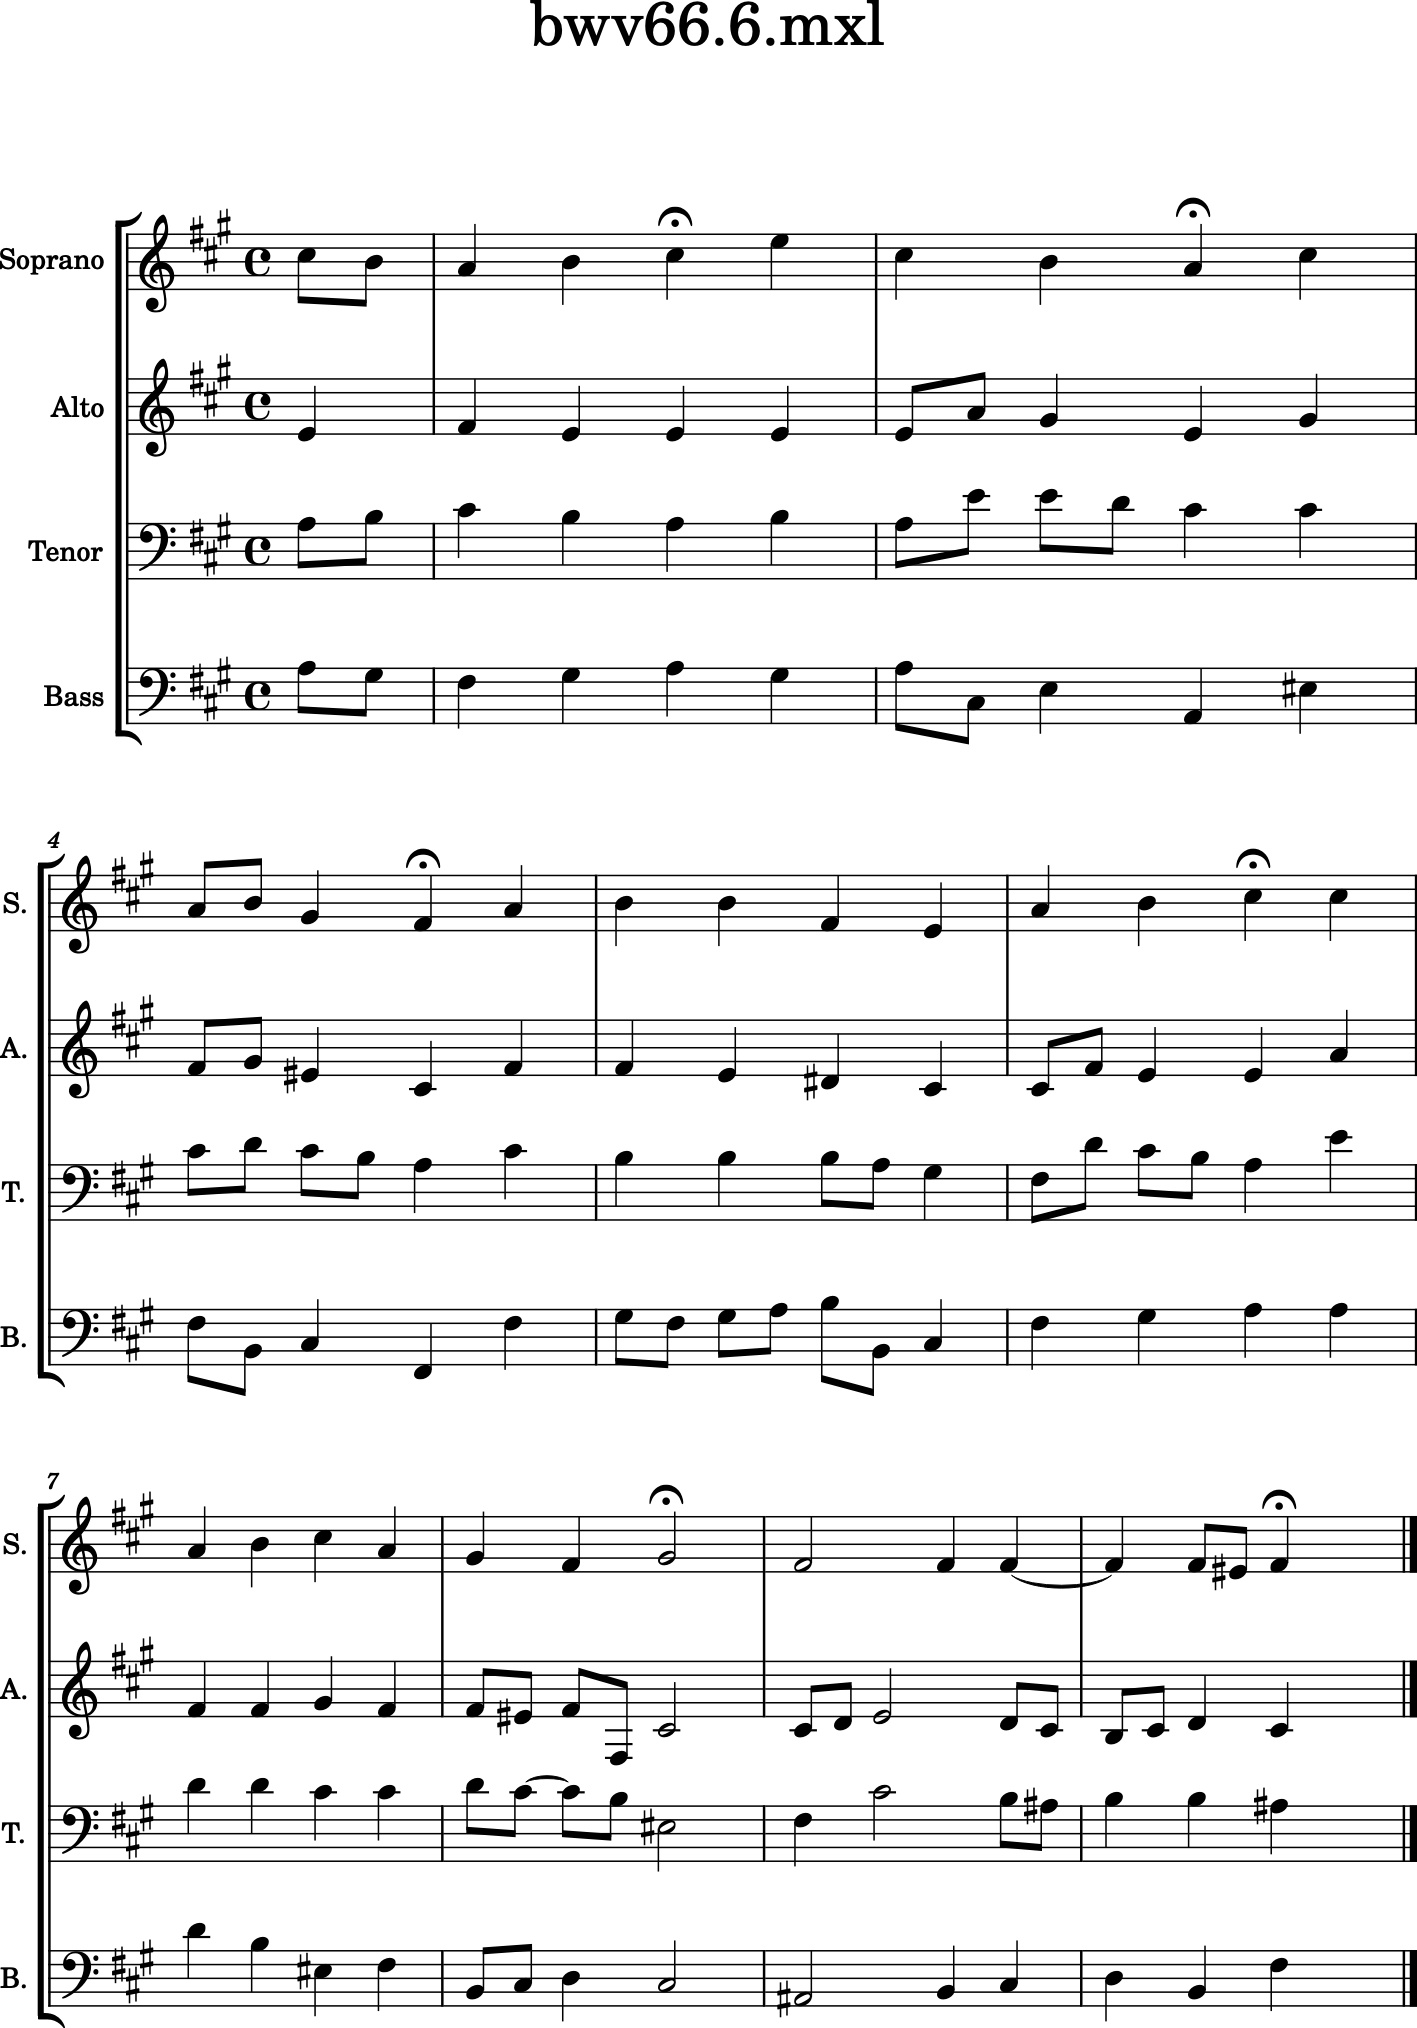

In [10]:
bach = corpus.parse('bwv66.6')
multishow(bach)

Introduce (for the first time for real) diatonicNoteNum -- analogy to MIDI number.

In [11]:
n = note.Note('C4')
n.pitch.diatonicNoteNum

29

In [12]:
n = note.Note('C#4')
n.pitch.diatonicNoteNum

29

In [13]:
n.pitch.diatonicNoteNum += 6
n.pitch

<music21.pitch.Pitch B#4>

## Random Walk Composition

Explain Random Walk.

Students are given this code:

```
import copy
current_dnn = 29

s = stream.Stream()
...
multishow(s)
```

They have 5 (in reality, 10) minutes to create a random-walk piece.

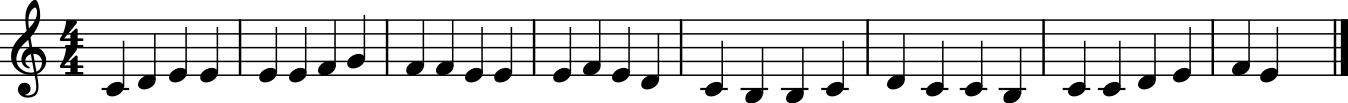

In [14]:
import copy
current_dnn = 29

n2 = copy.deepcopy(n)

s = stream.Stream()
for i in range(30):
    n = note.Note()
    n.pitch.diatonicNoteNum = current_dnn
    s.append(n)
    current_dnn += random.choice([-1, 0, 1])

multishow(s)

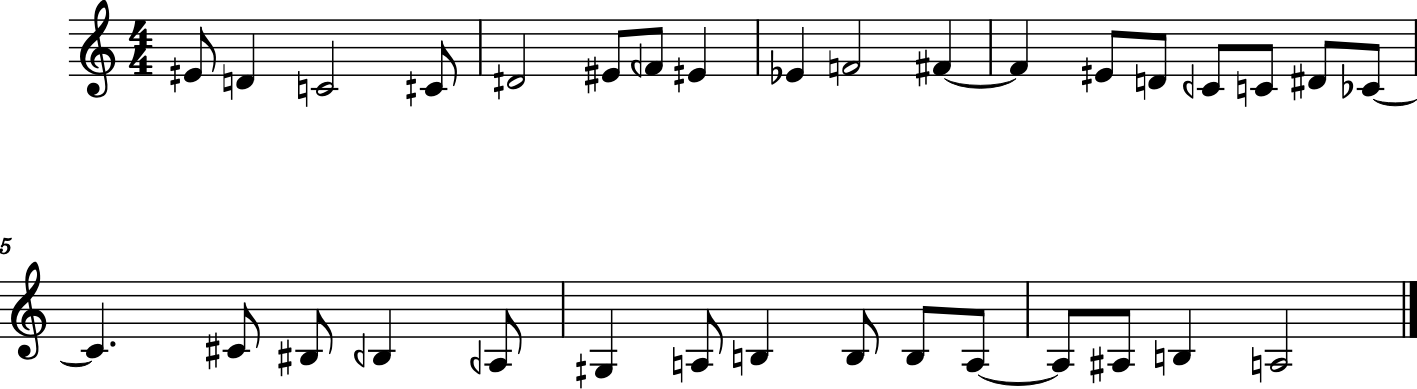

In [15]:
s = stream.Stream()
for i in range(30):
    n = note.Note()
    n.pitch.diatonicNoteNum = current_dnn
    n.pitch.accidental = pitch.Accidental(random.choice([-1, 0, 1, 0, 0, -0.5, 0.5]))
    n.duration.type = random.choice(['half', 'quarter', 'eighth', 'eighth'])
    s.append(n)
    current_dnn += random.choice([-1, 0, 1])

multishow(s)

In [16]:
# for hearing quarter tones -- recent macOS d/l APPlayMIDI.app
s.write('midi')

PosixPath('/var/folders/mk/qf43gd_s5f30rzzbt7l7l01h0000gn/T/music21/tmph2722dxu.mid')

Let's give a melodic profile.

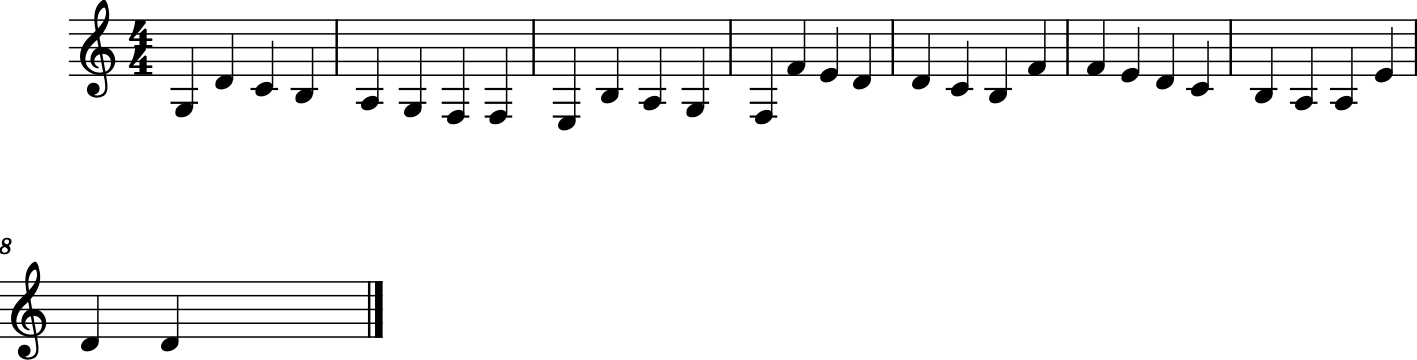

In [18]:
s = stream.Stream()
for i in range(30):
    n = note.Note()
    n.pitch.diatonicNoteNum = current_dnn
    s.append(n)
    current_dnn += random.choice([-1, -1, -1, -1, -1, 0, 4, 7])

multishow(s)

## Now some rhythm:

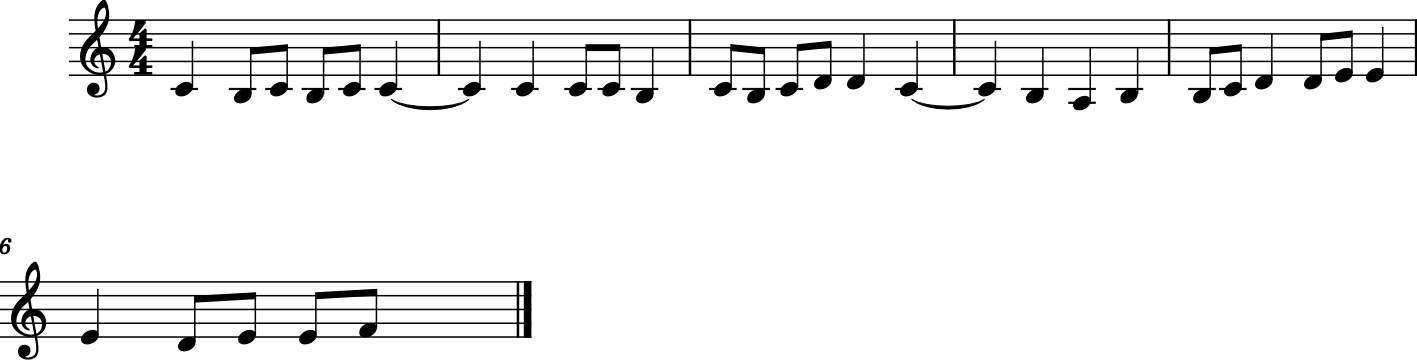

In [20]:
current_dnn = 29
next_note_must_be_eighth = False

s = stream.Stream()
for i in range(30):
    n = note.Note()
    n.pitch.diatonicNoteNum = current_dnn
    if not next_note_must_be_eighth:
        n.duration.type = random.choice(['half', 'quarter', 'eighth', 'eighth'])
        if n.duration.type == 'eighth':
            next_note_must_be_eighth = True
    else:
        n.duration.type = 'eighth'
        next_note_must_be_eighth = False
    
    s.append(n)
    current_dnn += random.choice([-1, 0, 1])

multishow(s)

### Multi part

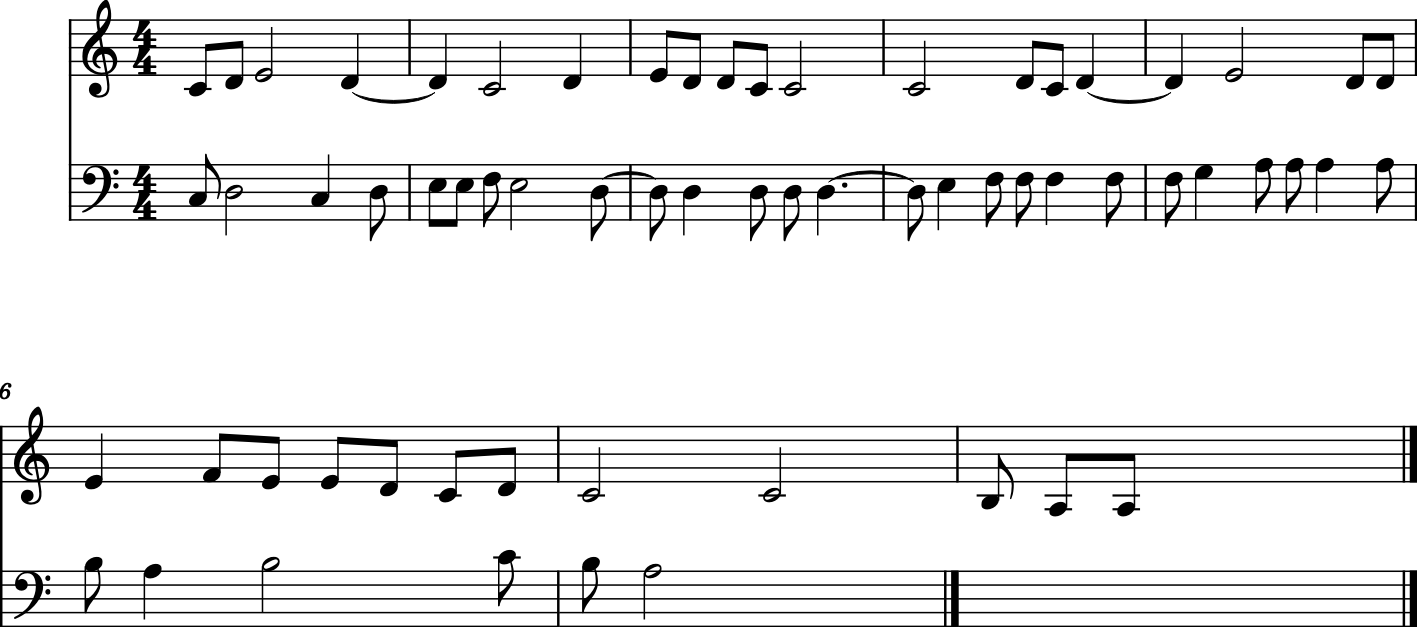

In [23]:
current_dnn = 29
next_note_must_be_eighth = False

sc = stream.Score()
for part_num in range(2):
    current_dnn = 29
    current_dnn -= (7 * part_num)
    p = stream.Part()
    
    for i in range(30):
        n = note.Note()
        n.pitch.diatonicNoteNum = current_dnn
        if not next_note_must_be_eighth:
            n.duration.type = random.choice(['half', 'quarter', 'eighth', 'eighth'])
            if n.duration.type == 'eighth':
                next_note_must_be_eighth = True
        else:
            n.duration.type = 'eighth'
            next_note_must_be_eighth = False

        p.append(n)
        current_dnn += random.choice([-1, 0, 1])
    sc.insert(0, p)

multishow(sc)

### 3 parts with consonance control.

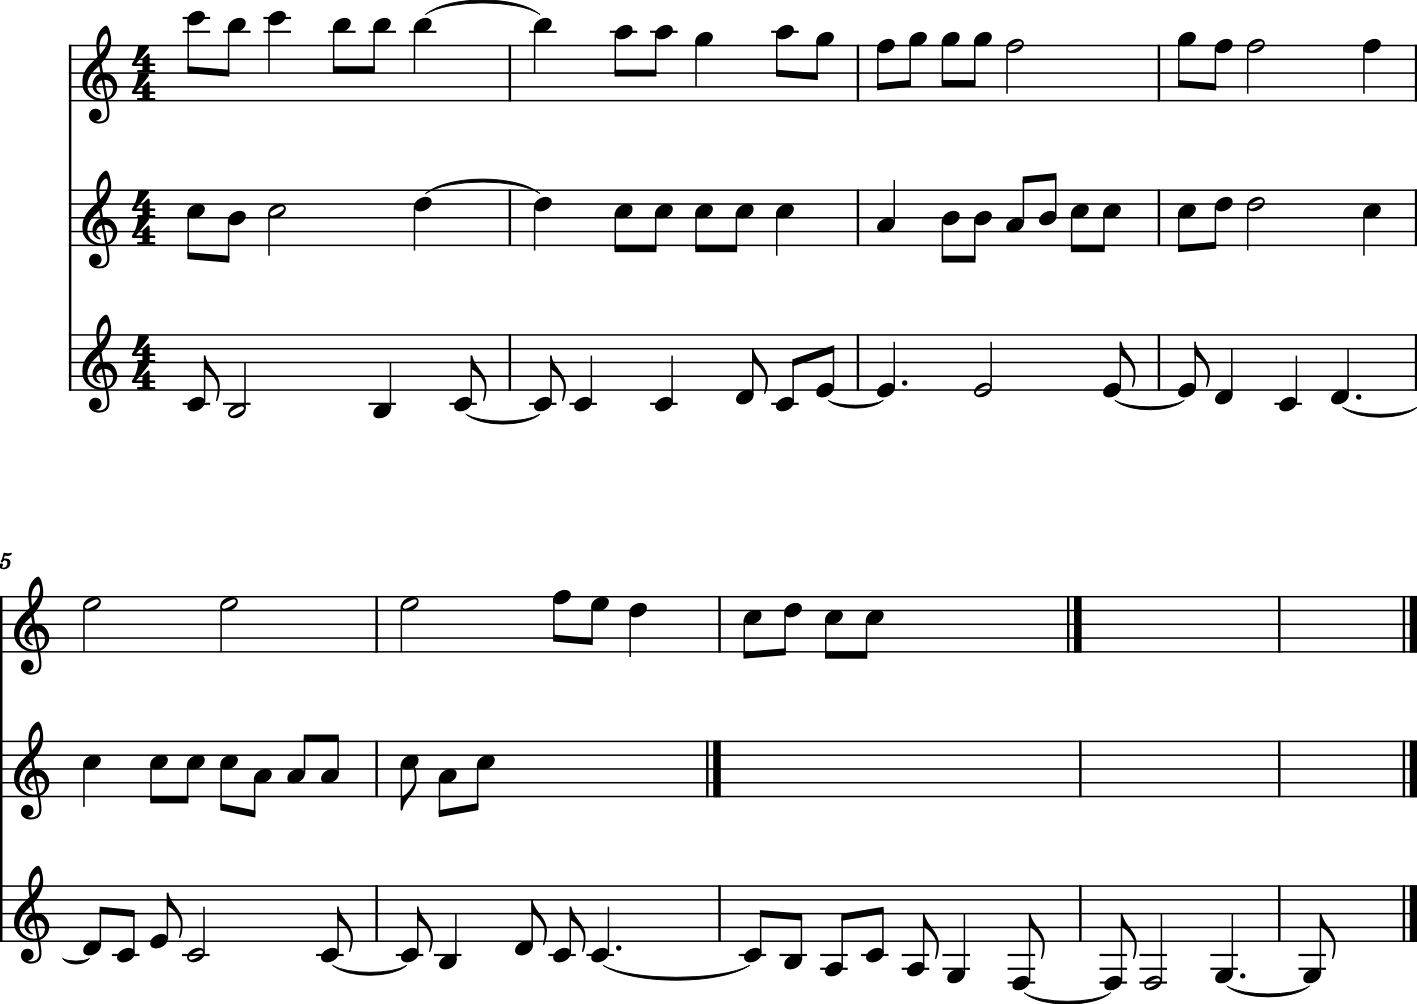

In [25]:
current_dnn = 29
next_note_must_be_eighth = False

sc = stream.Score()
controlling_part = None
for part_num in range(3):
    current_dnn = 29 + 14
    current_dnn -= (7 * part_num)
    p = stream.Part()
    if part_num == 0:
        controlling_part = p
    
    for i in range(30):
        n = note.Note()
        n.pitch.diatonicNoteNum = current_dnn
        if not next_note_must_be_eighth:
            n.duration.type = random.choice(['half', 'quarter', 'eighth', 'eighth'])
            if n.duration.type == 'eighth':
                next_note_must_be_eighth = True
        else:
            n.duration.type = 'eighth'
            next_note_must_be_eighth = False

        p.append(n)
        if p is not controlling_part:
            n_offset = n.offset
            other_n = controlling_part.getElementsByOffset(n_offset, n_offset + 1).notes.first()
            if other_n is not None:
                intv = interval.Interval(n, other_n)
                if not intv.isConsonant():
                    n.pitch.diatonicNoteNum += 1
        
        current_dnn += random.choice([-1, 0, 1])
    sc.insert(0, p)

multishow(sc)

## A P[i]e[a]ce for Jessica

End by playing this 1 minute random walk composition from 2009, written in 10 (well, 13) minutes.